

```
# Выбран кодовый формат
```


##**NLP задача: Задача мультиклассовой классификации**

### **Рассматриваются вопросы по категориям людей с сайта **

In [ ]:

from nltk.probability import FreqDist


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# !pip install spacy --upgrade
import spacy.cli
spacy.cli.download("ru_core_news_sm")
import spacy
# !pip install pymorphy2 --upgrade

✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [ ]:
nlp=spacy.load('ru_core_news_sm')

Импорт библиотеки Pandas

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import nltk
nltk.download('wordnet')

from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data = pd.read_excel('dataset2.xlsx')
df = data.rename(columns={'Unnamed: 0': 'Индекс'})
df.head()

,Индекс,Вопрос,Категория,Ответ
0,0,Что такое СМЭВ?,Что такое СМЭВ,Система межведомственного электронного взаимод...
1,1,что такое смэв,Что такое СМЭВ,Система межведомственного электронного взаимод...
2,2,СМЭВ,Что такое СМЭВ,Система межведомственного электронного взаимод...
3,3,Как можно использовать смэв,Что такое СМЭВ,Система межведомственного электронного взаимод...
4,4,Система межведомственного электронного взаимод...,Что такое СМЭВ,Система межведомственного электронного взаимод...


Наблюдается дизбаланс классов

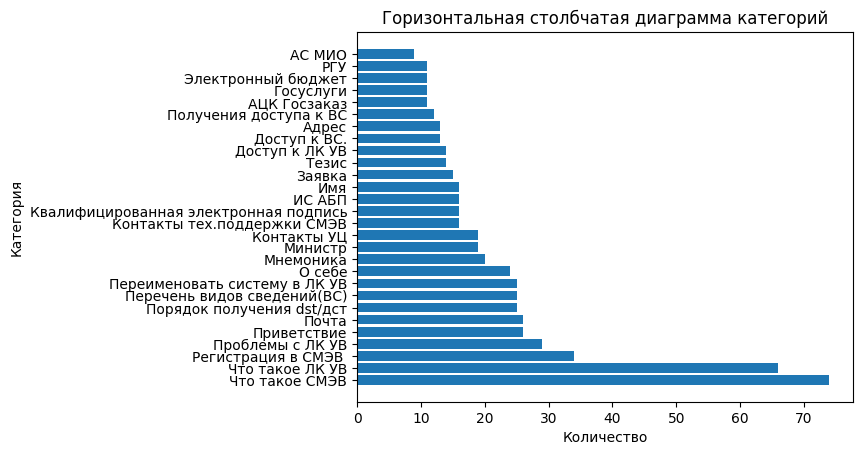

Заявка                                   74
АЦК Госзаказ                             66
Тезис                                    34
Доступ к ВС.                             29
Проблемы с ЛК УВ                         26
РГУ                                      26
Госуслуги                                25
АС МИО                                   25
Регистрация в СМЭВ                       25
Почта                                    24
Перечень видов сведений(ВС)              20
О себе                                   19
Получения доступа к ВС                   19
Министр                                  16
Контакты УЦ                              16
Контакты тех.поддержки СМЭВ              16
ИС АБП                                   16
Электронный бюджет                       15
Что такое ЛК УВ                          14
Адрес                                    14
Квалифицированная электронная подпись    13
Порядок получения dst/дст                13
Что такое СМЭВ                  

In [ ]:
cateroies=df['Категория'].unique()
values=df['Категория'].value_counts()
import matplotlib.pyplot as plt

categories = df['Категория'].unique()
values = df['Категория'].value_counts()

plt.barh(categories, values)  # Используем barh() для построения горизонтальной столбчатой диаграммы
plt.xlabel('Количество')
plt.ylabel('Категория')
plt.title('Горизонтальная столбчатая диаграмма категорий')
plt.show()
values


In [ ]:
# import pandas as pd

# # Предположим, что у вас есть DataFrame df с колонками "features" и "label"
# # и класс с малым количеством данных имеет метку "class_1"

# # Выделение данных для класса с малым количеством данных
# class_1_data = df[df['Категория'] == 'Приветствие']

# # Определение множителя для дублирования данных (в данном случае - 3)
# multiplier = 2

# # Дублирование данных для класса
# duplicated_data = pd.concat([class_1_data] * multiplier, ignore_index=True)

# # Находим индекс последней дублированной строки
# last_duplicate_index = duplicated_data.index.max()

# # Вставка данных после последней дублированной строки
# df = pd.concat([df.iloc[:last_duplicate_index + 1], duplicated_data, df.iloc[last_duplicate_index + 1:]], ignore_index=True)


In [ ]:
# Assuming 'Text' column contains the text data
text_data = df['Вопрос']
text_data

0                                        Что такое СМЭВ?
1                                         что такое смэв
2                                                   СМЭВ
3                           Как можно использовать смэв 
4      Система межведомственного электронного взаимод...
                             ...                        
627           логин и пароль от ГИС управления закупками
628                             ГИС управления закупками
629                   ГИС управления закупками контракты
630              ГИС управления закупками слетели данные
631                             Ацк формирование отчётов
Name: Вопрос, Length: 632, dtype: object

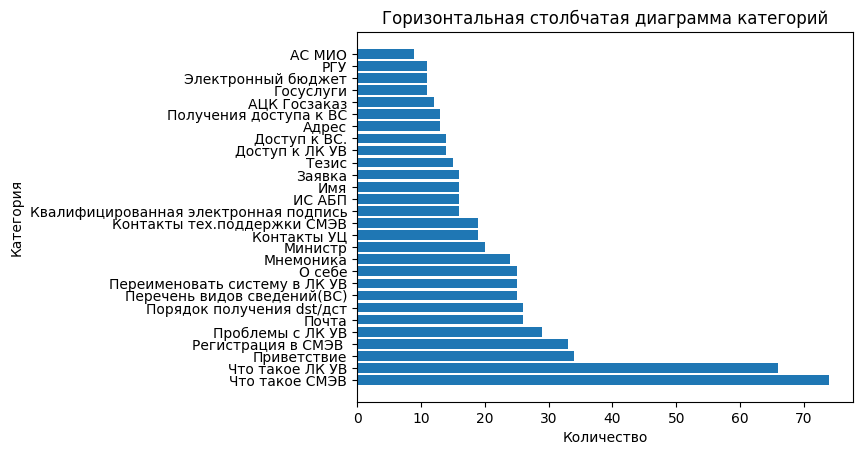

Заявка                                   74
АЦК Госзаказ                             66
Тезис                                    34
Приветствие                              33
Доступ к ВС.                             29
Проблемы с ЛК УВ                         26
РГУ                                      26
АС МИО                                   25
Регистрация в СМЭВ                       25
Госуслуги                                25
Почта                                    24
Перечень видов сведений(ВС)              20
О себе                                   19
Получения доступа к ВС                   19
Министр                                  16
Контакты УЦ                              16
Контакты тех.поддержки СМЭВ              16
ИС АБП                                   16
Электронный бюджет                       15
Адрес                                    14
Что такое ЛК УВ                          14
Квалифицированная электронная подпись    13
Порядок получения dst/дст       

In [ ]:
cateroies=df['Категория'].unique()
values=df['Категория'].value_counts()
import matplotlib.pyplot as plt
import numpy as np

categories = df['Категория'].unique()
values = df['Категория'].value_counts()

plt.barh(categories, values)  # Используем barh() для построения горизонтальной столбчатой диаграммы
plt.xlabel('Количество')
plt.ylabel('Категория')
plt.title('Горизонтальная столбчатая диаграмма категорий')
plt.show()
values


In [ ]:
sum_counts = values.sum()
bins = int(np.sqrt((sum_counts)))
import seaborn as sns
bins

25

In [ ]:
# from collections import Counter

# max_tokens = 100  # Максимальное число токенов

# for key in categories:
#     df_temp = df[df['Категория'] == key]
#     texts = df_temp['Вопрос']

#     word_counts = {}
#     token_count = 0

#     for text in texts:
#         doc = nlp(text)
#         for token in doc:
#             if not token.is_punct and not token.is_space:
#                 lemma = token.lemma_.lower()
#                 if lemma in word_counts:
#                     word_counts[lemma] += 1
#                 else:
#                     word_counts[lemma] = 1

#                 token_count += 1
#                 if token_count >= max_tokens:
#                     break

#         if token_count >= max_tokens:
#             break

#     counter = Counter(word_counts)
#     top_5_words = counter.most_common(5)
#     for word, count in top_5_words:
#         print(word, "-", count)
#     print('-------------------------')


Очистка данных

In [ ]:
import re
patterns = "[A-Za-z0-9!#$%&'()*+,.``'«»'/:;<=>?@[\]^_`{|}~—\"\-]+"

In [ ]:
def clean(doc):
    doc = re.sub(patterns, ' ', doc)
    return doc
text_data.apply(clean)

0                                        Что такое СМЭВ 
1                                         что такое смэв
2                                                   СМЭВ
3                           Как можно использовать смэв 
4      Система межведомственного электронного взаимод...
                             ...                        
627           логин и пароль от ГИС управления закупками
628                             ГИС управления закупками
629                   ГИС управления закупками контракты
630              ГИС управления закупками слетели данные
631                             Ацк формирование отчётов
Name: Вопрос, Length: 632, dtype: object

Добавление стоп-слов для лучшей обработки данных

In [ ]:
# Tokenize the text data
tokenized_data = []
custom_stop_words=[]
import re
patterns = "[A-Za-z0-9!#$%&'()*+,.``'«»'/:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
stopwords_ru.remove("ты")
stopwords_ru.remove("о")
stopwords_ru.remove("себе")
stopwords_ru.remove("тебя")
stopwords_ru.append("что")
stopwords_ru.append("такой")
morph = MorphAnalyzer()


In [ ]:
stopwords_ru.append('доступ')
stopwords_ru.append('взаимодействие')

Токенизация и Лемматизация

In [ ]:
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)

    tokens = []
    for token in doc.split():
        token = token.strip().lower()
        if token not in ['тебя','себе','не','что']:
          token = morph.normal_forms(token)[0]
          if token.strip() and token not in stopwords_ru:
            tokens.append(token)
        else:
          tokens.append(token)
    return tokens

In [ ]:
tokens = text_data.apply(lemmatize)


In [ ]:
for i in tokens:
  print(i)

['что', 'смэв']
['что', 'смэв']
['смэв']
['использовать', 'смэв']
['система', 'межведомственный', 'электронный', 'нужный']
['что', 'означать', 'аббревиатура', 'смэв']
['что', 'значит', 'смэв']
['являться', 'система', 'межведомственный', 'электронный', 'смэв']
['рсмэв']
['система', 'межведомственный', 'электронный']
['что', 'означать', 'аббревиатура', 'смэв']
['расшифровка', 'смэв']
['что', 'лк', 'ува']
['определение', 'расшифровка', 'аббревиатура', 'лк', 'ува']
['являться', 'личный', 'кабинет', 'участник']
['нужный', 'личный', 'кабинет', 'участник']
['лк', 'ува']
['лк', 'ува']
['нужный', 'лк', 'ува']
['аббривеиатура', 'лк', 'ува']
['расшифровка', 'лк', 'ува']
['необходимый', 'личный', 'кабинет', 'участинк']
['привет']
['здравствуй']
['день', 'добрый']
['приветик']
['приветствовать']
['добрый', 'день']
['здравствуйте']
['утро', 'добрый']
['добрый', 'утро']
['дратуть']
['здаров']
['привет']
['здравствуй']
['день', 'добрый']
['приветик']
['приветствовать']
['добрый', 'день']
['здравствуйт

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=df['Категория'].values




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = [' '.join(token) for token in tokens]
text = [s.replace("ува", "ув") for s in text]
tfidfconverter = TfidfVectorizer()
X = tfidfconverter.fit_transform(text)
text




['что смэв',
 'что смэв',
 'смэв',
 'использовать смэв',
 'система межведомственный электронный нужный',
 'что означать аббревиатура смэв',
 'что значит смэв',
 'являться система межведомственный электронный смэв',
 'рсмэв',
 'система межведомственный электронный',
 'что означать аббревиатура смэв',
 'расшифровка смэв',
 'что лк ув',
 'определение расшифровка аббревиатура лк ув',
 'являться личный кабинет участник',
 'нужный личный кабинет участник',
 'лк ув',
 'лк ув',
 'нужный лк ув',
 'аббривеиатура лк ув',
 'расшифровка лк ув',
 'необходимый личный кабинет участинк',
 'привет',
 'здравствуй',
 'день добрый',
 'приветик',
 'приветствовать',
 'добрый день',
 'здравствуйте',
 'утро добрый',
 'добрый утро',
 'дратуть',
 'здаров',
 'привет',
 'здравствуй',
 'день добрый',
 'приветик',
 'приветствовать',
 'добрый день',
 'здравствуйте',
 'утро добрый',
 'добрый утро',
 'дратуть',
 'здаров',
 'что лк ув',
 'что означать лк ув',
 'личный кабинет участник создавать',
 'что означать личный к

Обучающая модель на основе случайного леса

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,label,stratify=label,test_size=0.25,random_state=42)
classifier = RandomForestClassifier(n_estimators=1000, random_state=3)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=3)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  4  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0
   0  0  0  0]
 [ 0  1  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  

Предсказания

In [ ]:
docs_new = ['здравствуйте', 'ты кто?','расскажи что такое смэв?','что такое лк ув','фигня',"как получить доступ к вс?","как тебя зовут?","какое у тебя имя","что умеешь?"]
import numpy as np
threshold = 0.5
docs=tfidfconverter.transform(docs_new)
# Make predictions on the new documents
predicted = classifier.predict(docs)

# Print the predictions
for doc, category in zip(docs, predicted):
  # print(f"{doc} ")
  nonzero_indices = doc.nonzero()
  if len(nonzero_indices[0]) > 0:
    weights = [doc[i, j] for i, j in zip(nonzero_indices[0], nonzero_indices[1])]
    maximum_weight = max(weights)
    # print(f"The maximum weight is: {maximum_weight}")
    if(maximum_weight>=threshold):
      print(category)
    else:
      print("There are no non-zero elements in the document.1")
  else:
    print("There are no non-zero elements in the document.2")




Приветствие
О себе
Что такое СМЭВ
Что такое ЛК УВ
There are no non-zero elements in the document.2
Получения доступа к ВС
Имя
Имя
О себе


In [ ]:
predicted

array(['Приветствие', 'О себе', 'Что такое СМЭВ', 'Что такое ЛК УВ',
       'Заявка', 'Получения доступа к ВС', 'Имя', 'Имя', 'О себе'],
      dtype=object)

Проверка на основе логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,label,stratify=label,test_size=0.2,random_state=42)
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,log_reg.predict(X_test))

0.7244094488188977

In [ ]:
from sklearn.preprocessing import LabelEncoder
labels=df['Категория']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
labels=[' '.join(labels) for token in labels]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = [' '.join(token) for token in tokens]

tfidfconverter = TfidfVectorizer()
X = tfidfconverter.fit_transform(text)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,encoded_labels,test_size=0.25,stratify=labels,random_state=42)
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  4  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0]
 [ 1  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  1  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(text, encoded_labels, test_size=0.25, random_state=42)

# Initialize a CountVectorizer object
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)


In [ ]:
from collections import Counter
cnt = Counter(y_test)
dict(cnt)
print(cnt)
Counter(y_train)


Counter({6: 22, 1: 20, 20: 11, 21: 10, 22: 8, 23: 8, 12: 8, 9: 6, 8: 6, 11: 5, 0: 5, 3: 5, 16: 5, 19: 5, 14: 5, 4: 5, 7: 4, 26: 4, 18: 3, 13: 3, 5: 2, 2: 2, 27: 2, 17: 1, 15: 1, 24: 1, 10: 1})


Counter({2: 12,
         1: 46,
         6: 52,
         13: 8,
         5: 9,
         4: 24,
         18: 10,
         24: 33,
         7: 12,
         11: 11,
         26: 8,
         27: 13,
         21: 16,
         10: 15,
         9: 7,
         3: 20,
         14: 14,
         16: 15,
         23: 17,
         25: 14,
         12: 8,
         22: 18,
         19: 19,
         20: 22,
         17: 18,
         0: 20,
         15: 8,
         8: 5})

Гистограмма категорий

6 22 52
11 5 11
0 5 20
18 3 10
3 5 20
5 2 9
16 5 15
21 10 16
22 8 18
7 4 12
20 11 22
23 8 17
26 4 8
9 6 7
19 5 19
8 6 5
1 20 46
17 1 18
2 2 12
12 8 8
13 3 8
14 5 14
4 5 24
27 2 13
15 1 8
24 1 33
10 1 15


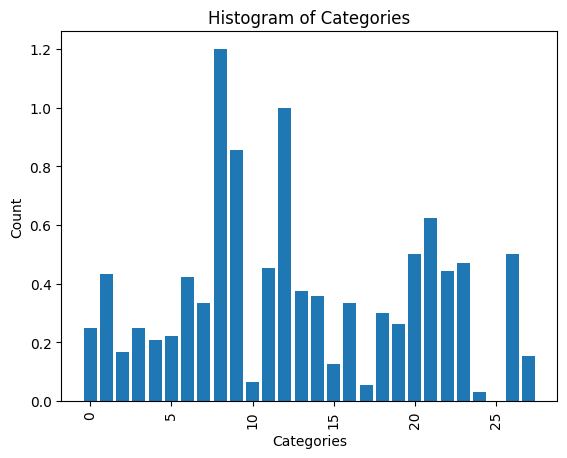

In [ ]:
import matplotlib.pyplot as plt

# Your Counter object
cnt = Counter(y_test)
cnt2 = Counter(y_train)
# Convert the Counter object to a dictionary
counts = dict(cnt)
labels = list(counts.keys())
values=[]
for key, value1 in cnt.items():
    value2 = cnt2[key]
    print(key, value1, value2)
    values.append(value1/value2)

# Plot the histogram
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Histogram of Categories')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

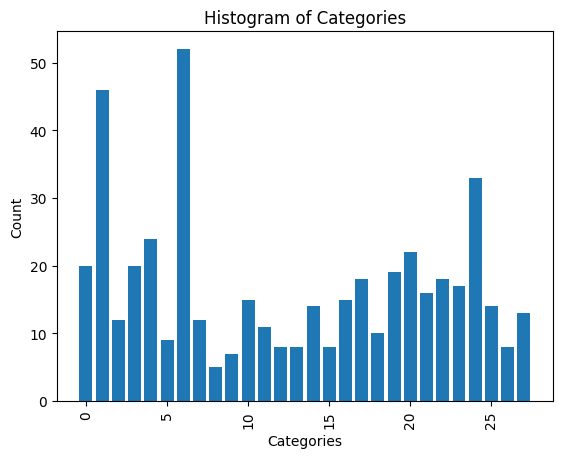

In [ ]:
import matplotlib.pyplot as plt

# Your Counter object
cnt = Counter(y_train)

# Convert the Counter object to a dictionary
counts = dict(cnt)

# Extract the labels (categories) and counts from the dictionary
labels = list(counts.keys())
values = list(counts.values())

# Plot the histogram
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Histogram of Categories')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

Обучение на основе SGD классификатора

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfVectorizer()
X = tfidfconverter.fit_transform(text)


In [ ]:
label=df['Категория']
X_train, X_test, y_train, y_test = train_test_split(text,label,stratify=label,test_size=0.2,random_state=42)

In [ ]:
X[0]

<1x410 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

text_clf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),

 ])
text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0
   0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  1  0  0  0  3  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  1  0  0  0  0  0  1  0  0  0  1  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
logreg = Pipeline([
                ('vect', CountVectorizer(analyzer='char', ngram_range =(2,10))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=3,C=1e5, solver='saga',
                                           multi_class='multinomial',
                                           max_iter=1000,
                                           random_state=42)),
])


logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[ 4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0]
 [ 0 13  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  1  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 1  0  0  0  0  0  6  0  0  0  0  2  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

In [ ]:
docs_new = ['здравствуйте', 'ты кто?','расскажи что такое смэв?','лк ув?','о себе']
predicted = text_clf.predict(docs_new)
print(predicted)


['Приветствие' 'О себе' 'Регистрация в СМЭВ ' 'Доступ к ЛК УВ' 'О себе']
